In [1]:
import pygplates
import numpy as np  
import matplotlib.pyplot as plt
import pandas as pd

import pt_validation as ptv

%matplotlib inline
%load_ext autoreload
%autoreload 2

reconstruction_basedir = '../paleogeography/Paleogeography_Matthews2016_410-2Ma_Shapefiles/'
rotation_model = pygplates.RotationModel('%s/Global_EarthByte_230-0Ma_GK07_AREPS.rot' % reconstruction_basedir)

static_polygons = pygplates.FeatureCollection('/Applications/GPlates-2.0.0/SampleData/FeatureCollections/ContinentalPolygons/Matthews_etal_GPC_2016_ContinentalPolygons.gpmlz')



    

In [2]:
pbdb = pd.read_csv('/Users/Simon/Data/pbdb/pbdb_occs.csv',delimiter=',',skiprows=14)

print 'Total records read = %s' % pbdb.size

pbdb = pbdb.dropna(subset=['environment','lat','lng'])
print 'Total records with valid environment = %s' % pbdb.size

print pbdb.columns

print pbdb.environment.unique()


/Users/Simon/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (12,19,20,21,22,29,30,31,32,33,34,35,36,37,38,40,41,42,43,44,45,46,47,48,49,50,51,52,53) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Total records read = 97112015
Total records with valid environment = 91071981
Index([u'occurrence_no', u'record_type', u'reid_no', u'superceded',
       u'collection_no', u'taxon_name', u'taxon_rank', u'taxon_no',
       u'matched_name', u'matched_rank', u'matched_no', u'early_interval',
       u'late_interval', u'early_age', u'late_age', u'reference_no', u'lng',
       u'lat', u'cc', u'state', u'county', u'geogscale', u'protected',
       u'early_age.1', u'late_age.1', u'cx_int_no', u'early_int_no',
       u'late_int_no', u'formation', u'stratgroup', u'member', u'stratscale',
       u'zone', u'localsection', u'localbed', u'localorder',
       u'regionalsection', u'regionalbed', u'regionalorder', u'stratcomments',
       u'lithdescript', u'lithology1', u'lithadj1', u'lithification1',
       u'minor_lithology1', u'fossilsfrom1', u'lithology2', u'lithadj2',
       u'lithification2', u'minor_lithology2', u'fossilsfrom2', u'environment',
       u'tectonic_setting', u'geology_comments', u'c

Time 10 Ma | 3076227 valid records | 32571 records with selected environment
Time 12 Ma | 3030335 valid records | 5390 records with selected environment
Time 14 Ma | 3245088 valid records | 11627 records with selected environment
Time 16 Ma | 3401783 valid records | 13475 records with selected environment
Time 18 Ma | 3332868 valid records | 13475 records with selected environment
Time 20 Ma | 3274502 valid records | 13398 records with selected environment
Time 22 Ma | 2593360 valid records | 10857 records with selected environment
Time 24 Ma | 1795640 valid records | 12859 records with selected environment
Time 26 Ma | 1761760 valid records | 12859 records with selected environment
Time 28 Ma | 1778084 valid records | 12859 records with selected environment
Time 30 Ma | 1856162 valid records | 17402 records with selected environment
Time 32 Ma | 1780394 valid records | 16478 records with selected environment
Time 34 Ma | 2753828 valid records | 191653 records with selected environment

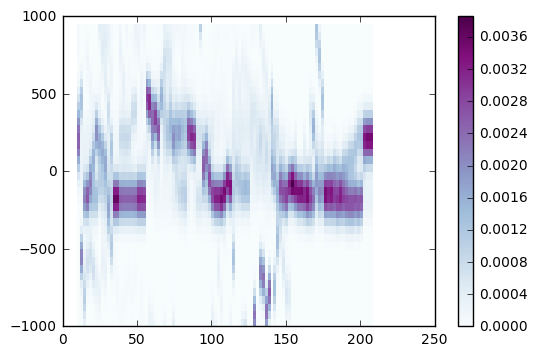

In [3]:
hlist = []
time_list = np.arange(10,210,2)

environment_search_string = 'delta'

for comparison_time in time_list:
    
    # Add time range specifier
    #pbdb_subset = pbdb[(pbdb.early_age<(comparison_time+10.)) & (pbdb.late_age>(comparison_time-10.))]
    pbdb_subset = pbdb[(pbdb.early_age>comparison_time) & (pbdb.late_age<comparison_time)
                      & (pbdb.lat>=-90.) & (pbdb.lat<=90.) & (pbdb.lng>=-180.) & (pbdb.lng<=180)]
    pbdb_subset2 = pbdb_subset[pbdb_subset.environment.str.contains(environment_search_string)]
    print 'Time %d Ma | %s valid records | %s records with selected environment' % (comparison_time,
                                                                                    pbdb_subset.size,
                                                                                    pbdb_subset2.size)                                                                             

    bc,h = ptv.indicator_z_distribution(pbdb_subset2,
                                        static_polygons,rotation_model,
                                        comparison_time)

    hlist.append(h)


plt.pcolormesh(time_list,bc,np.array(hlist).T,cmap=plt.cm.BuPu) #,vmin=0,vmax=0.4)
plt.colorbar()



In [5]:
zdf = pd.read_hdf('/Users/Simon/GIT/pygplates-paleo/geology/Puetz_zircons.h5')

print 'Total records read = %s' % zdf.size

print 'Total records with valid environment = %s' % zdf.size

print zdf.columns


Total records read = 28489756
Total records with valid environment = 28489756
Index([                                                                                                  u'Data set No.',
                                                                                                                 u'Year',
                                                                             u'Authors, year - Journal Vol(Issue):pages',
                                                                                                            u'Table No.',
                                                                                                            u'Continent',
                                                                                                              u'Country',
                                                                                                             u'Locality',
                                                                    

Time 10 Ma | 16048 valid records
Time 12 Ma | 17816 valid records
Time 14 Ma | 21896 valid records
Time 16 Ma | 25296 valid records
Time 18 Ma | 30396 valid records
Time 20 Ma | 32436 valid records
Time 22 Ma | 31552 valid records
Time 24 Ma | 27540 valid records
Time 26 Ma | 20400 valid records
Time 28 Ma | 12512 valid records
Time 30 Ma | 13872 valid records
Time 32 Ma | 18564 valid records
Time 34 Ma | 19108 valid records
Time 36 Ma | 18700 valid records
Time 38 Ma | 13668 valid records
Time 40 Ma | 8772 valid records
Time 42 Ma | 7820 valid records
Time 44 Ma | 9112 valid records
Time 46 Ma | 6324 valid records
Time 48 Ma | 5508 valid records
Time 50 Ma | 7820 valid records
Time 52 Ma | 5644 valid records
Time 54 Ma | 5644 valid records
Time 56 Ma | 6528 valid records
Time 58 Ma | 7208 valid records
Time 60 Ma | 8908 valid records
Time 62 Ma | 7752 valid records
Time 64 Ma | 4488 valid records
Time 66 Ma | 4012 valid records
Time 68 Ma | 3944 valid records
Time 70 Ma | 5780 valid r

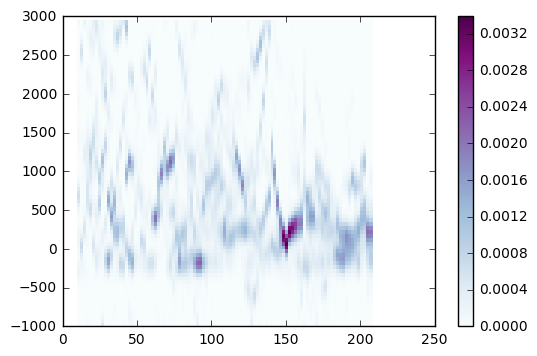

In [11]:
hlist = []

for comparison_time in time_list:
    
    # Add time range specifier
    #pbdb_subset = pbdb[(pbdb.early_age<(comparison_time+10.)) & (pbdb.late_age>(comparison_time-10.))]
    zdf_subset = zdf[(zdf['Model-1: Age with smallest error']>comparison_time-2.) 
                    & (zdf['Model-1: Age with smallest error']<comparison_time+2.)
                    & (zdf['Primary\nRock Type'].str.contains('ign'))]


    
    print 'Time %d Ma | %s valid records' % (comparison_time,zdf_subset.size)
    
    if zdf_subset.size>0:
        bc,h = ptv.indicator_z_distribution(zdf_subset,
                                            static_polygons,rotation_model,
                                            comparison_time,
                                            longitude_field_name='Longitude',
                                            latitude_field_name='Latitude')

        hlist.append(h)


plt.pcolormesh(time_list,bc,np.array(hlist).T,cmap=plt.cm.BuPu) #,vmin=0,vmax=0.4)
plt.colorbar()


Time 10 Ma | 68 valid records
Time 12 Ma | 340 valid records
Time 14 Ma | 1020 valid records
Time 16 Ma | 3332 valid records
Time 18 Ma | 6732 valid records
Time 20 Ma | 4624 valid records
Time 22 Ma | 816 valid records
Time 24 Ma | 952 valid records
Time 26 Ma | 1972 valid records
Time 28 Ma | 3128 valid records
Time 30 Ma | 2380 valid records
Time 32 Ma | 1224 valid records
Time 34 Ma | 2244 valid records
Time 36 Ma | 1836 valid records
Time 38 Ma | 1020 valid records
Time 40 Ma | 1496 valid records
Time 42 Ma | 1360 valid records
Time 44 Ma | 952 valid records
Time 46 Ma | 680 valid records
Time 48 Ma | 680 valid records
Time 50 Ma | 748 valid records
Time 52 Ma | 1020 valid records
Time 54 Ma | 816 valid records
Time 56 Ma | 748 valid records
Time 58 Ma | 748 valid records
Time 60 Ma | 680 valid records
Time 62 Ma | 884 valid records
Time 64 Ma | 1088 valid records
Time 66 Ma | 952 valid records
Time 68 Ma | 408 valid records
Time 70 Ma | 476 valid records
Time 72 Ma | 544 valid re

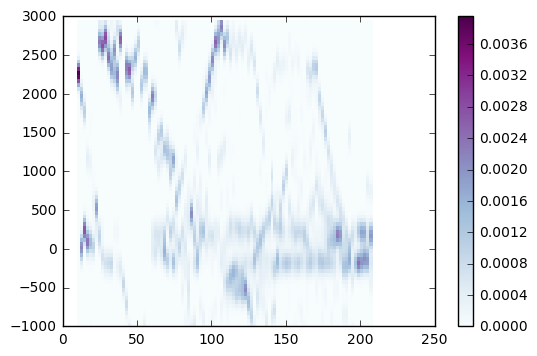

In [12]:
hlist = []

for comparison_time in time_list:
    
    # Add time range specifier
    #pbdb_subset = pbdb[(pbdb.early_age<(comparison_time+10.)) & (pbdb.late_age>(comparison_time-10.))]
    zdf_subset = zdf[(zdf['Model-1: Age with smallest error']>comparison_time-2.) 
                    & (zdf['Model-1: Age with smallest error']<comparison_time+2.)
                    & (zdf['Primary\nRock Type'].str.contains('meta'))]


    
    print 'Time %d Ma | %s valid records' % (comparison_time,zdf_subset.size)
    
    if zdf_subset.size>0:
        bc,h = ptv.indicator_z_distribution(zdf_subset,
                                            static_polygons,rotation_model,
                                            comparison_time,
                                            longitude_field_name='Longitude',
                                            latitude_field_name='Latitude')

        hlist.append(h)


plt.pcolormesh(time_list,bc,np.array(hlist).T,cmap=plt.cm.BuPu) #,vmin=0,vmax=0.4)
plt.colorbar()